In [171]:
from comet_ml import Experiment
# Создайте эксперимент с помощью вашего API ключа
experiment = Experiment(
    api_key="6Ga3e8coVWoOIpAreIY8DKEgJ",
    project_name="hotels",
    workspace="dekoz",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/dekoz/hotels/7f77109c2b6b47a4a74384460c20a391



In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [173]:
hotels = pd.read_csv('data/hotels.csv')
hotels.head(3)


,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643


{'web': 'https://www.comet.ml/api/image/download?imageId=2d3def965f9d41708c1f108f3a921b83&experimentKey=7f77109c2b6b47a4a74384460c20a391',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=2d3def965f9d41708c1f108f3a921b83&experimentKey=7f77109c2b6b47a4a74384460c20a391',
 'imageId': '2d3def965f9d41708c1f108f3a921b83'}

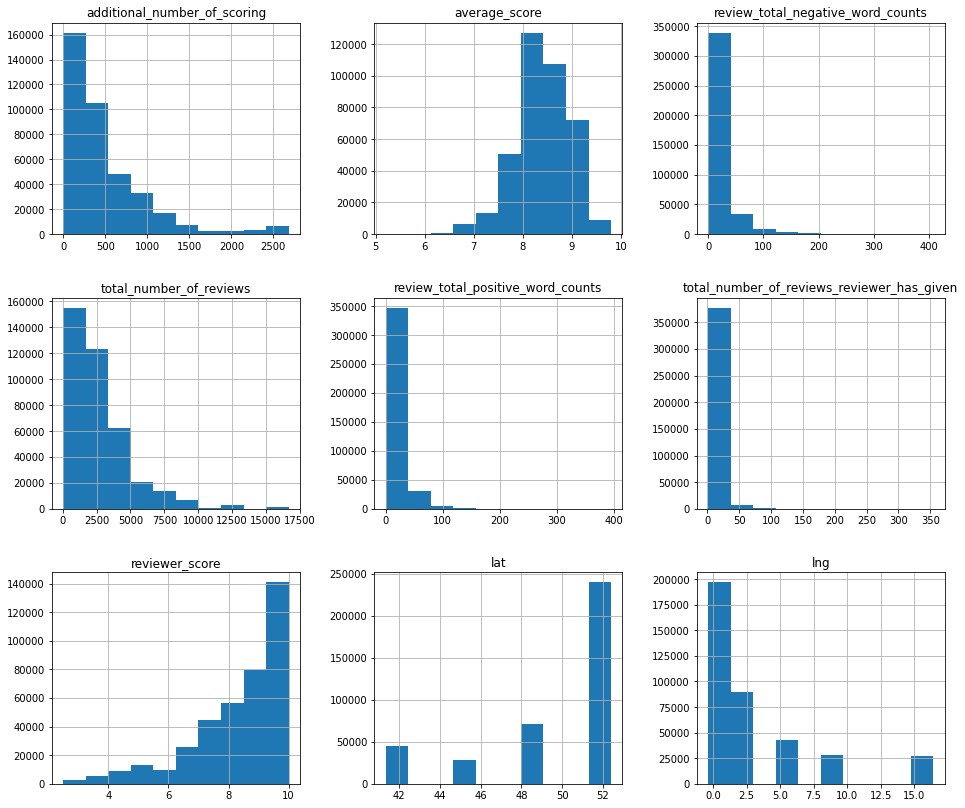

In [174]:
hotels.hist(figsize=(16,14));
#логируем гистограмму
experiment.log_figure()

In [175]:
# hotels.to_excel('data/hotels.xlsx')   
hotels.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [176]:
# Задание 4.2
# Сколько отелей представлено в наборе данных?
len(hotels['hotel_name'].unique())

1492

In [177]:
# Задание 4.3
# Ответьте на вопросы о дате размещения отзывов.
# Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.
print(pd.to_datetime(hotels['review_date']).max())
# Когда был оставлен самый первый отзыв? Введите ответ в формате yyyy-mm-dd.
print(pd.to_datetime(hotels['review_date']).min())

2017-08-03 00:00:00
2015-08-04 00:00:00


In [156]:
# Задание 4.4
# Сколько уникальных тегов представлено в наборе данных?
tag_dict=dict()

for lst in hotels['tags']:
    lst = lst.strip('][').replace("' ", "").replace(" '", "").split(', ')
    for tag in lst:
        if tag not in tag_dict.keys():
            tag_dict.update({ tag : 1})
        else:
            tag_dict[tag] +=1
tag_dict = sorted(tag_dict.items(), key=lambda x: x[1], reverse=True)
print(len(tag_dict))
print(tag_dict[0])
tag_dict[0:5]
hotels['tags_len'] = hotels['tags'].apply(lambda x : len(x.strip('][').replace("' ", "").replace(" '", "").split(', ')))
hotels['tags_len']

2368
('Leisure trip', 313593)


0         5
1         4
2         5
3         4
4         4
         ..
386798    5
386799    5
386800    4
386801    4
386802    4
Name: tags_len, Length: 386803, dtype: int64

In [157]:
from dateutil.parser import parse

hotels['year'] = hotels['review_date'].apply(lambda x: parse(x).year)
hotels['month'] = hotels['review_date'].apply(lambda x: parse(x).month)
hotels['day'] = hotels['review_date'].apply(lambda x: parse(x).day)
hotels.drop('review_date', axis=1, inplace=True)
hotels.head(3)

,hotel_address,additional_number_of_scoring,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,tags_len,year,month,day
0,Stratton Street Mayfair Westminster Borough Lo...,581,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,5,2016,2,19
1,130 134 Southampton Row Camden London WC1B 5AF...,299,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,4,2017,1,12
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643,5,2016,10,18


In [158]:
# убираем признаки которые еще не успели обработать, 
# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in hotels.columns if hotels[s].dtypes == 'object']
hotels.drop(object_columns, axis = 1, inplace=True)

# заполняем пропуски самым простым способом
hotels['lat'] = hotels.fillna(hotels['lat'].median)
hotels['lng'] = hotels.fillna(hotels['lng'].median)
hotels.head(3)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,lat,lng,tags_len,year,month,day
0,581,8.4,3,1994,4,7,10.0,581,581,5,2016,2,19
1,299,8.3,3,1361,2,14,6.3,299,299,4,2017,1,12
2,32,8.9,6,406,0,14,7.5,32,32,5,2016,10,18


In [159]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией об отелях, у - целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score'] 

In [160]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [161]:
random_state = 42 
test_size=0.25
n_estimators=100

In [162]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [163]:
params={"random_state":random_state, 
        "test_size":test_size,
        "n_estimators":n_estimators
 
}

In [164]:
experiment.log_parameters(params)

In [165]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
  
# Создаём модель  
regr = RandomForestRegressor(n_estimators=n_estimators)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  


In [166]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений от фактических.  
MAPE = metrics.mean_absolute_percentage_error(y_test, y_pred)
print('MAPE:', MAPE)
metric = {'MAPE': MAPE}

MAPE: 0.1373867048682568


{'web': 'https://www.comet.ml/api/image/download?imageId=86a14c9cdb264c4da9129a44ac036d2f&experimentKey=e094a19c2d244f9cb4ef389567ac385a',
 'api': 'https://www.comet.ml/api/rest/v1/image/get-image?imageId=86a14c9cdb264c4da9129a44ac036d2f&experimentKey=e094a19c2d244f9cb4ef389567ac385a',
 'imageId': '86a14c9cdb264c4da9129a44ac036d2f'}

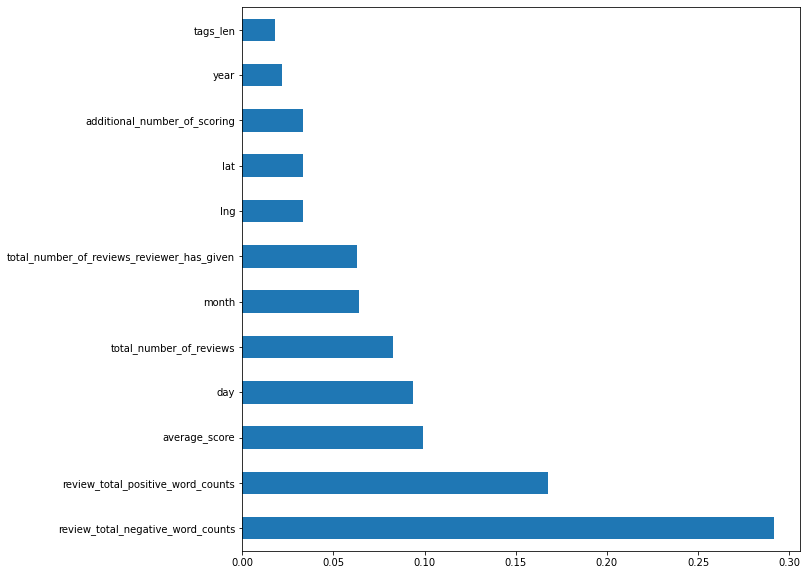

In [168]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
experiment.log_figure()

In [169]:
experiment.log_metrics(metric)

In [ ]:
# experiment.log_confusion_matrix(y_test.tolist(), y_pred.tolist())
# #COMET ERROR: Error creating confusion matrix: y_true and y_predicted should have the same lengths (386803 != 96701); ignoring

In [ ]:
# experiment.display()

In [170]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/dekoz/hotels/e094a19c2d244f9cb4ef389567ac385a
COMET INFO:   Metrics:
COMET INFO:     MAPE : 0.1373867048682568
COMET INFO:   Parameters:
COMET INFO:     bootstrap                : True
COMET INFO:     ccp_alpha                : 0.0
COMET INFO:     criterion                : squared_error
COMET INFO:     max_depth                : 1
COMET INFO:     max_features             : 1.0
COMET INFO:     max_leaf_nodes           : 1
COMET INFO:     max_samples              : 1
COMET INFO:     min_impurity_decrease    : 0.0
COMET INFO:     min_samples_leaf         : 1
COMET INFO:     min_samples_split        : 2
COMET INFO:     min_weight_fraction_leaf : 0.0
COMET INFO:     n_estimators             : 100
COMET INFO:     n_jobs                   : 1
COMET INFO